# Тестовое задание на вакансию Data Scientist

Ссылка на условия задач и данные: https://drive.google.com/drive/folders/1RMI8JNiMeQfLlYCTELGj6c9gib6_Pirw

## Задача №1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Построим распределения X и Y (случайные величины с нормальным распределением) и получим значение дисперсии при значениях `a` и `b` от 0 до 1

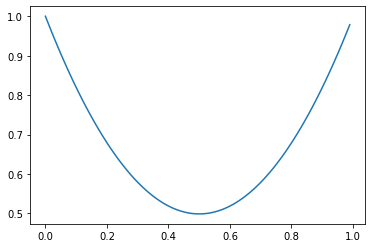

In [18]:
X = np.random.normal(0,1, 1000000)
Y = np.random.normal(0,1, 1000000)
coefs = []
vars = []
for a in np.arange(0, 1, 0.01):
    coefs.append(a)
    vars.append(np.var(a*X+(1-a)*Y))

result_s = pd.Series(data=vars, index=coefs)
result_s.plot()
None

Значение `a`, при котором достигнуто минимальное значение дисперсии

In [21]:
result_s.idxmin() # 

0.5

***Ответ:*** Минимальное значение дисперсии `S` получено при значениях `a=b=0.5`

***Объяснение:*** Так как мы фактически считаем дисперсию суммы случайных величин, одна из которых умножается на `a`, а другая на `1-a`, то минимальное значение размаха этих величин (а значит и дисперсии) будет достигнуто, когда и `a`, и `b` принимают наимельшие значения. Проверим это построив графики плотности распределения при различных значениях `a`, и `b` и `S`

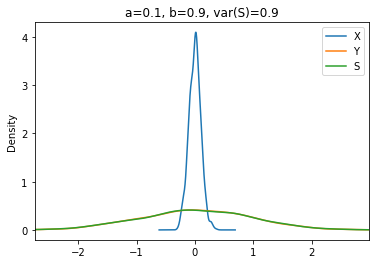

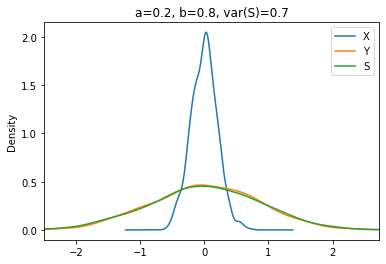

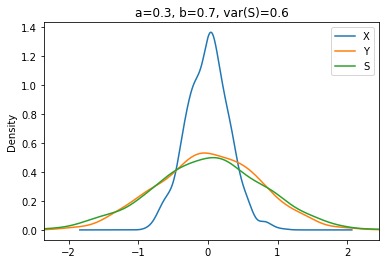

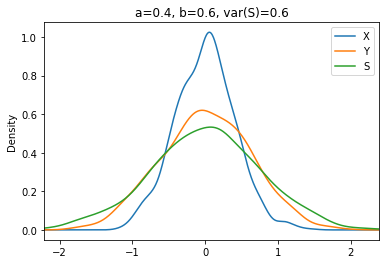

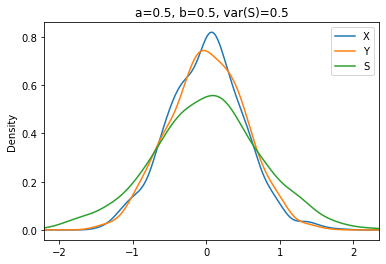

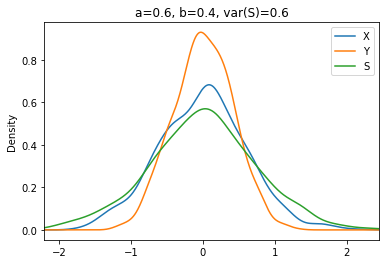

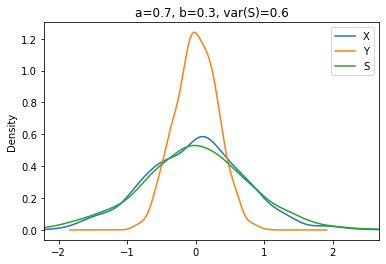

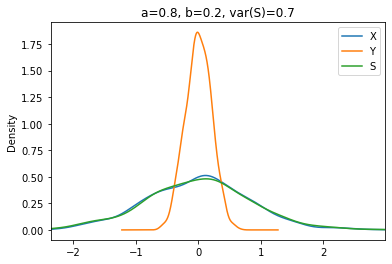

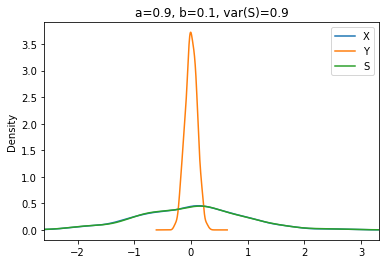

In [3]:
X = np.random.normal(0,1, 1000)
Y = np.random.normal(0,1, 1000)
coefs = []
vars = []
for a in np.arange(0.1, 1, 0.1):
    df = pd.DataFrame(data={'X':a*X, 'Y':(1-a)*Y, 'S':a*X+(1-a)*Y})
    df.plot(kind='kde', xlim=(df['S'].min(), df['S'].max()), title=f'a={a:.1f}, b={(1-a):.1f}, var(S)={np.var(a*X+(1-a)*Y):.1f}')
    plt.show()

С увеличением `a` и уменьшением `b` дисперсия `S` снижается, пока `a` и `b` не сравняются. После этого дисперсия `S` снова увеличивается.

## Задача №2

Загрузим данные

In [4]:
df_exec = pd.read_csv('exec_logs.log', header=None)
df_exec.head()

,0,1,2,3,4,5
0,eLog: order exec at 1622505601222248272 with i...,side 1,price 1108.6,traded volume 1,volume left on level 10,delta_execsend 30451968
1,eLog: order exec at 1622505601424113404 with i...,side -1,price 1108.4,traded volume 1,volume left on level 22,delta_execsend 17118720
2,eLog: order exec at 1622505601604667896 with i...,side 1,price 1108.3,traded volume 1,volume left on level 2,delta_execsend 153866496
3,eLog: order exec at 1622505602982200992 with i...,side -1,price 1108.4,traded volume 1,volume left on level 1,delta_execsend 153371136
4,eLog: order exec at 1622505603600579508 with i...,side 1,price 1108.3,traded volume 1,volume left on level 6,delta_execsend 618378496


In [5]:
df_market = pd.read_csv('market_logs.log', header=None)
df_market.head()

,0,1,2
0,mLog: market trd at 1622505601191796236 with s...,price 1108.9,traded volume 36 then book became 6@1108.7x11...
1,mLog: market trd at 1622505601222248272 with s...,price 1108.7,traded volume 17 then book became 10@1108.5x1...
2,mLog: market trd at 1622505601364445668 with s...,price 1108.5,traded volume 20 then book became 16@1108.3x1...
3,mLog: market trd at 1622505601405325968 with s...,price 1108.6,traded volume 1 then book became 16@1108.3x11...
4,mLog: market trd at 1622505601406994624 with s...,price 1108.3,traded volume 16 then book became 18@1108.2x1...


Распределим значения по столбцам и приведем к правильным типам данных

In [6]:
df_exec_split = pd.DataFrame()
df_exec_split['time'] = df_exec[0].str.split(' ', expand=True)[4].astype(np.int64)
df_exec_split['id'] = df_exec[0].str.split(' ', expand=True)[7]
df_exec_split['side'] = df_exec[1].str.split(' ', expand=True)[2].astype(int)
df_exec_split['price'] = df_exec[2].str.split(' ', expand=True)[2].astype(float)
df_exec_split['traded_volume'] = df_exec[3].str.split(' ', expand=True)[3].astype(int)
df_exec_split['volume_left'] = df_exec[4].str.split(' ', expand=True)[5].astype(int)
df_exec_split['delta_execsend'] = df_exec[5].str.split(' ', expand=True)[2].astype(np.int64)
df_exec_split

,time,id,side,price,traded_volume,volume_left,delta_execsend
0,1622505601222248272,281481419161600,1,1108.6,1,10,30451968
1,1622505601424113404,562956395872256,-1,1108.4,1,22,17118720
2,1622505601604667896,844431372582912,1,1108.3,1,2,153866496
3,1622505602982200992,1125906349293568,-1,1108.4,1,1,153371136
4,1622505603600579508,1407381326004224,1,1108.3,1,6,618378496
...,...,...,...,...,...,...,...
8677,1627626326117581668,146366994331992072,1,1149.9,1,564,2381312
8678,1627626397873668620,148337319168966664,-1,1150.2,1,331,1296281088
8679,1627626412584847188,146929944285413384,1,1150.1,1,97,14703859968
8680,1627626473991536064,149181744099098632,-1,1150.4,1,10,12134184704


In [7]:
df_exec_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8682 entries, 0 to 8681
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            8682 non-null   int64  
 1   id              8682 non-null   object 
 2   side            8682 non-null   int32  
 3   price           8682 non-null   float64
 4   traded_volume   8682 non-null   int32  
 5   volume_left     8682 non-null   int32  
 6   delta_execsend  8682 non-null   int64  
dtypes: float64(1), int32(3), int64(2), object(1)
memory usage: 373.2+ KB


In [8]:
%%time
df_market_split = pd.DataFrame()
df_market_split['time'] = df_market[0].str.split(' ', expand=True)[4].astype(np.int64)
df_market_split['side'] = df_market[0].str.split(' ', expand=True)[7].astype(int)
df_market_split['price'] = df_market[1].str.split(' ', expand=True)[2].astype(float)
df_market_split['traded_volume'] = df_market[2].str.split(' ', expand=True)[3].astype(int)

df_market_split['volume_bid'] = df_market[2].str.split(' ', expand=True)[7].str.split('@', expand=True)[0].astype(int)
df_market_split['volume_ask'] = df_market[2].str.split(' ', expand=True)[7].str.split('@', expand=True)[2].astype(int)

df_market_split['bid_price'] = df_market[2].str.split(' ', expand=True)[7].str.split('@', expand=True)[1].str.split('x', expand=True)[0].astype(float)
df_market_split['ask_price'] = df_market[2].str.split(' ', expand=True)[7].str.split('@', expand=True)[1].str.split('x', expand=True)[1].astype(float)

df_market_split

CPU times: total: 38 s
Wall time: 38 s


,time,side,price,traded_volume,volume_bid,volume_ask,bid_price,ask_price
0,1622505601191796236,-1,1108.9,36,6,104,1108.7,1108.8
1,1622505601222248272,-1,1108.7,17,10,23,1108.5,1108.6
2,1622505601364445668,-1,1108.5,20,16,23,1108.3,1108.6
3,1622505601405325968,1,1108.6,1,16,22,1108.3,1108.6
4,1622505601406994624,-1,1108.3,16,18,12,1108.2,1108.3
...,...,...,...,...,...,...,...,...
397797,1627626542759155628,1,1150.5,1,217,92,1150.4,1150.5
397798,1627626543983252140,1,1150.5,1,187,126,1150.4,1150.5
397799,1627626549091604988,1,1150.5,94,6,365,1150.5,1150.6
397800,1627626549092524892,-1,1150.5,6,177,365,1150.4,1150.6


In [9]:
df_market_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397802 entries, 0 to 397801
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   time           397802 non-null  int64  
 1   side           397802 non-null  int32  
 2   price          397802 non-null  float64
 3   traded_volume  397802 non-null  int32  
 4   volume_bid     397802 non-null  int32  
 5   volume_ask     397802 non-null  int32  
 6   bid_price      397802 non-null  float64
 7   ask_price      397802 non-null  float64
dtypes: float64(3), int32(4), int64(1)
memory usage: 18.2 MB


Посчитаем `mid_price`

In [10]:
df_market_split['mid_price'] = (df_market_split['bid_price'] + df_market_split['ask_price']) / 2
df_market_split.sort_values(by='time', inplace=True)

In [11]:
# Функция для вычисления dmid5
def get_mid_price(row, lag=5*10**9):
    cur_time = row['time'] # берем время собственной сделки
    new_time = cur_time + lag # прибавляем 5 секунд
    new_price = df_market_split.loc[df_market_split['time']>=new_time, 'mid_price'].head(1).values[0] # берем рыночные сделки, которые произошли позднее 5 секунд и берем самую раннюю из них
    return (new_price - row['price']) * row['side'] # возвращаем dmid5

In [12]:
%%time
df_exec_split['dmid5'] = df_exec_split.apply(get_mid_price, axis=1)
df_exec_split

CPU times: total: 48.3 s
Wall time: 48.5 s


,time,id,side,price,traded_volume,volume_left,delta_execsend,dmid5
0,1622505601222248272,281481419161600,1,1108.6,1,10,30451968,0.05
1,1622505601424113404,562956395872256,-1,1108.4,1,22,17118720,-0.05
2,1622505601604667896,844431372582912,1,1108.3,1,2,153866496,0.15
3,1622505602982200992,1125906349293568,-1,1108.4,1,1,153371136,-0.15
4,1622505603600579508,1407381326004224,1,1108.3,1,6,618378496,0.05
...,...,...,...,...,...,...,...,...
8677,1627626326117581668,146366994331992072,1,1149.9,1,564,2381312,-0.05
8678,1627626397873668620,148337319168966664,-1,1150.2,1,331,1296281088,0.05
8679,1627626412584847188,146929944285413384,1,1150.1,1,97,14703859968,0.05
8680,1627626473991536064,149181744099098632,-1,1150.4,1,10,12134184704,-0.05


Распределение `dmid5`

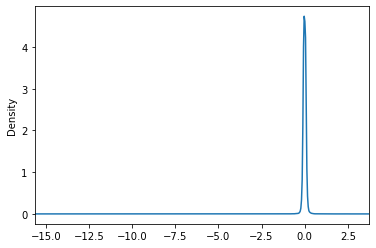

In [14]:
df_exec_split['dmid5'].plot(kind='kde', xlim=(df_exec_split['dmid5'].min(), df_exec_split['dmid5'].max()))
None

In [15]:
df_exec_split['dmid5'].describe()

count    8682.000000
mean       -0.008126
std         0.265246
min       -15.650000
25%        -0.050000
50%         0.000000
75%         0.050000
max         3.750000
Name: dmid5, dtype: float64

Считаем коэффициент корреляции Пирсона между `dmid5` и `delta_execsend`

In [16]:
df_exec_split[['dmid5', 'delta_execsend']].corr()

,dmid5,delta_execsend
dmid5,1.000000,0.022884
delta_execsend,0.022884,1.000000


***Ответ:*** значение корреляции между `dmid5` и `delta_execsend` = 0.022884